## Loading data

In [1]:
def split_by_callers(calls_sequence):
    counter = 1
    caller = calls_sequence[0].split("##")[-1]
    splitted_sequences = []
    s_temp = []
    s_temp.append(calls_sequence[0])
    i = 1
    while True:
        if i == len(calls_sequence):
            splitted_sequences.append(s_temp)
            break
        c = calls_sequence[i]
        if c.startswith("#START#"):
            if counter == 0 and c.split("##")[-1] != caller:
                splitted_sequences.append(s_temp)
                s_temp = [c]
                if i == len(calls_sequence):
                    splitted_sequences.append(s_temp)
                    break
                else:
                    caller = c
            else:
                s_temp.append(c)
            counter += 1
        elif c.startswith("#END#"):
            counter -= 1
            s_temp.append(c)
        i = i + 1
    return splitted_sequences

In [2]:
import json

In [30]:
def generate_filtered_sequences(calls_seq):
    splitted_seqs = split_by_callers(calls_seq)
    final_list = []
    seq_calls = [calls_seq]
    while True:
        temp_seq = []
        for sc in seq_calls:
            temp_seq.extend(split_by_callers(sc))
        final_list.extend(temp_seq)
        seq_calls = []
        for s in temp_seq:
            if len(s) not in [0, 1, 2]:
                seq_calls.append(s[1:-1])

        if len(seq_calls)==0:
            break

    simple_final_list = []
    for l in final_list:
        simple_final_list.append([c.split("##")[0] for c in l])

    filtered_list = []
    for l in simple_final_list:
        new_l = []
        if l[0].startswith("#END#"):
            continue
        if len(l) == 0:
            continue
        c_old = l[0].split("#")[2]
        for c in l[1:]:
            if c.split("#")[2] == c_old:
                new_l.append(c_old)
            c_old = c.split("#")[2]
        filtered_list.append(new_l)

    filtered_list = [f for f in filtered_list if len(f) >= 2]

    return filtered_list

def generate_patterns(filtered_sequences, k=50):
    from prefixspan import PrefixSpan

    ps = PrefixSpan(filtered_sequences)
    top_k = ps.topk(k)
    return top_k

In [11]:
import os

traces = os.listdir("callgraph_seq")

In [15]:
len(traces)

27

In [55]:
import random

In [56]:
all_sequences = []
lengths_by_projects = []
sequence_by_project = []
for file in traces:
    try:
        print("READING FILE", file)
        with open(os.path.join("callgraph_seq", file)) as dseq:
            seq_calls = json.load(dseq)

        print("GENERATING FILTERED SEQUENCES...")
        fs =  generate_filtered_sequences(seq_calls)
        print("SIZE: ",  len(fs))
        #all_sequences.extend(fs)
        n_a_s = [e for e in fs if e.count('builtins.isinstance')<=5]
        n_a_s = [s for s in n_a_s if len(s)<100]
        lengths_by_projects.append((file, len(n_a_s)))
        if len(n_a_s) > 1893:
            random.shuffle(n_a_s)
            random.shuffle(n_a_s)
            all_sequences.extend(n_a_s[:1893])
            sequence_by_project.append(n_a_s[:1893])
        else:
            all_sequences.extend(n_a_s)
            sequence_by_project.append(n_a_s)
    except Exception as e:
        print(e)

READING FILE p16.json
GENERATING FILTERED SEQUENCES...
SIZE:  374
READING FILE p15.json
GENERATING FILTERED SEQUENCES...
SIZE:  380
READING FILE p2.json
GENERATING FILTERED SEQUENCES...
SIZE:  444
READING FILE p3.json
GENERATING FILTERED SEQUENCES...
SIZE:  410
READING FILE p53.json
GENERATING FILTERED SEQUENCES...
SIZE:  4
READING FILE p22.json
GENERATING FILTERED SEQUENCES...
SIZE:  142
READING FILE p57.json
GENERATING FILTERED SEQUENCES...
SIZE:  862
READING FILE p6.json
GENERATING FILTERED SEQUENCES...
SIZE:  2286
READING FILE p11.json
GENERATING FILTERED SEQUENCES...
SIZE:  10
READING FILE p10.json
GENERATING FILTERED SEQUENCES...
SIZE:  2043
READING FILE p13.json
GENERATING FILTERED SEQUENCES...
SIZE:  2462
READING FILE p9.json
GENERATING FILTERED SEQUENCES...
SIZE:  732
READING FILE p20.json
GENERATING FILTERED SEQUENCES...
SIZE:  12199
READING FILE p56.json
GENERATING FILTERED SEQUENCES...
SIZE:  10
READING FILE p5.json
GENERATING FILTERED SEQUENCES...
SIZE:  943
READING FILE p

In [57]:
new_all_sequences = [e for e in all_sequences if e.count('builtins.isinstance')<=5]
print(len(new_all_sequences))
new_all_sequences = [s for s in new_all_sequences if len(s)<100]

12191


In [63]:
concat_seq_proj = []

for sbp in sequence_by_project:
    concat_seq_proj.append(["-".join(s) for s in sbp])

In [74]:
pptr = "-".join(['builtins.isinstance', 'builtins.isinstance'])

In [75]:
cntp = 0
for csp in concat_seq_proj:
    for s in csp:
        if pptr in s:
            print(len(csp))
            cntp += 1
            break

1893


In [73]:
cntp

1

In [70]:
lengths_by_projects

[('p16.json', 147),
 ('p15.json', 224),
 ('p2.json', 161),
 ('p3.json', 380),
 ('p53.json', 4),
 ('p22.json', 48),
 ('p57.json', 738),
 ('p6.json', 983),
 ('p11.json', 10),
 ('p10.json', 1234),
 ('p13.json', 1351),
 ('p9.json', 473),
 ('p20.json', 6734),
 ('p56.json', 10),
 ('p5.json', 779),
 ('p19.json', 1823),
 ('p14.json', 31),
 ('p58.json', 216),
 ('p4.json', 259),
 ('p12.json', 44),
 ('p8.json', 7),
 ('p18.json', 110),
 ('p50.json', 47),
 ('p24.json', 329),
 ('p1.json', 300),
 ('p7.json', 81),
 ('p21.json', 509)]

In [76]:
cntp

1

In [58]:
all_topk = generate_patterns(new_all_sequences, k = 100)

In [62]:
for atk in all_topk:
    if len(atk[1]) > 1:
        print(atk)

(1701, ['builtins.isinstance', 'builtins.isinstance'])
(1342, ['builtins.isinstance', 'builtins.isinstance', 'builtins.isinstance'])
(1199, ['builtins.str', 'str.encode'])
(1192, ['str.replace', 'str.replace'])
(1150, ['shlex.split', 'str.replace'])
(1100, ['str.replace', 'str.replace', 'str.replace'])
(1000, ['builtins.str', 'bytes.join'])
(1000, ['builtins.str', 'str.encode', 'bytes.join'])
(1000, ['str.encode', 'bytes.join'])
(996, ['shlex.split', 'str.replace', 'str.replace'])
(996, ['shlex.split', 'str.replace', 'str.replace', 'str.replace'])
(969, ['Pattern.match', 'Match.span'])
(932, ['str.replace', 'str.replace', 'str.replace', 'str.replace'])
(917, ['str.replace', 'shlex.split'])
(910, ['str.replace', 'shlex.split', 'str.replace'])
(851, ['builtins.isinstance', 'list.append'])
(843, ['str.replace', 'shlex.split', 'str.replace', 'str.replace'])
(843, ['str.replace', 'shlex.split', 'str.replace', 'str.replace', 'str.replace'])
(770, ['Match.span', 'str.isidentifier'])
(730, ['P

In [ ]:
topk_per_project = []
for file in traces:
    print("READING FILE", file)
    with open(os.path.join("callgraph_seq", file)) as dseq:
        seq_calls = json.load(dseq)

    print("GENERATING FILTERED SEQUENCES...")
    fs =  generate_filtered_sequences(seq_calls)
    print("SIZE: ",  len(fs))
    print("MINING PATTERNS...")
    topk = generate_patterns(fs)
    print("END")
    print()
    topk_per_project.append(topk)

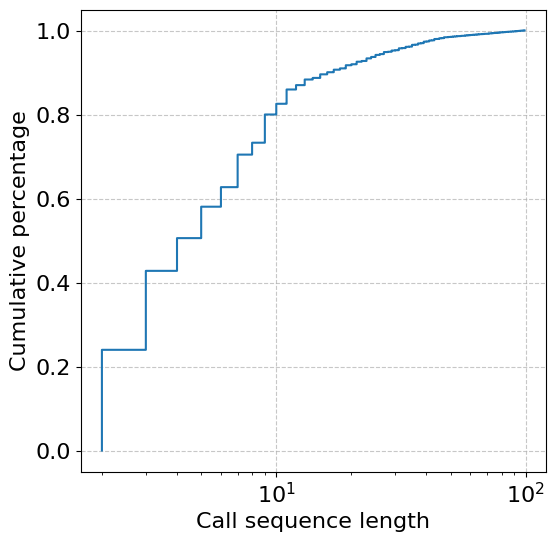

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data (replace this with your own data)
data = [len(s) for s in new_all_sequences]

# Sort the data in ascending order
sorted_data = np.sort(data)

# Calculate the CDF values
cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

# Create the CDF plot
plt.figure(figsize=(6, 6))
plt.step(sorted_data, cdf, label='CDF', where='post')
plt.xlabel("Call sequence length")
plt.ylabel('Cumulative percentage')
plt.xscale("log")
plt.grid(True, linestyle='--', alpha=0.7)
# Annotate the vertical line

plt.rc('font', size=16)
plt.show()

In [24]:
np.mean(data)

8.02606119240537

In [38]:
sorted(lengths_by_projects)


In [42]:
freq_dict = {}
for p, f in zip(x, y1):
    freq_dict[p] = f
freq_dict = {k:freq_dict[k] for k in sorted(freq_dict.keys())}

In [53]:
613 + 1280

1893

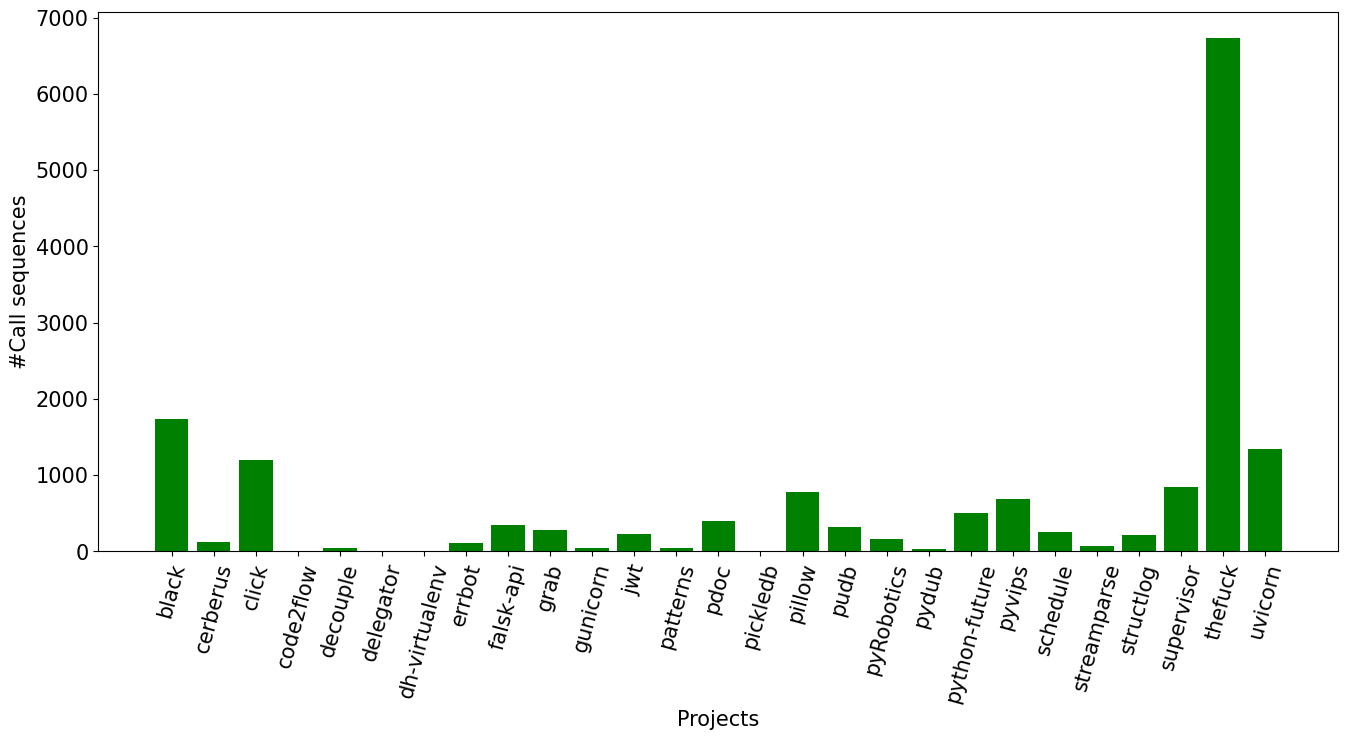

In [48]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(16, 7))

plt.rc('font', size=14)
# create data
x = ['grab', 
     'pyRobotics', 
     'falsk-api', 
     'schedule', 
     "pillow", 
     "supervisor", 
     "streamparse",
     "dh-virtualenv",
     "pdoc",
     "click",
     "delegator",
     "patterns",
     "uvicorn",
     "pydub",
     "jwt",
     "cerberus",
     "errbot",
     "black",
     "thefuck",
     "python-future",
     "decouple",
     "pudb",
     "gunicorn",
     "code2flow",
     "pickledb",
     "pyvips",
     "structlog"]

y1 = [280, 161, 341, 256, 777, 849, 76, 7, 397, 1199, 10, 44, 1348, 31, 222, 117, 110, 1731, 6734, 509, 46, 324, 47, 3, 10, 693, 216]

# plot bars in stack manner
ax1.bar(freq_dict.keys(), [freq_dict[k] for k in freq_dict], color='g')
ax1.set_xticks([i for i in range(len(x))], freq_dict.keys(),rotation=75)
ax1.set_xlabel('Projects')
ax1.set_ylabel('#Call sequences')


plt.rc('font', size=15)

plt.show()